# Homework 3

DUE DEC 1st at 11:59 PM


## Problem 1

In this problem, you will implement a simple feed-forward neural network using PyTorch, a straight-forward and simple-to-pickup framework for quickly prototyping deep learning model. 

PyTorch provides 2 powerful things. First, a nice data structure called Tensor (basically a matrix, similar to Numpy ndarray). Tensor is optimized for matrix calculation and can be loaded to a GPU. Tensor is also implemented so that it's easy to calculate and pass back chains of gradients, which is extremely useful for backpropagation on neural network. Second, a nice inner mechanism called Autograd that nicely map variables involved a chain of calculations and efficiently calculate their gradients via the chain rule when needed. Read more here: https://towardsdatascience.com/pytorch-autograd-understanding-the-heart-of-pytorchs-magic-2686cd94ec95  

You will train and evaluate the model on a simple dataset for classifying seeds. The dataset has 7 features and 3 labels. Refer to the example from the discussion session if needed. 

**In this problem, you are given a good amount of freedom in tweaking your choices in designing the network. As long as it's still a feed-forward network, it's fine. Accuracy does not matter as long as it's reasonable (like above 80%) but do try to achieve a high accuracy.**

(Optional): the dataset provided to you is very simple. Instead, you can challenge yourself by trying more difficult datasets. Some datasets that you can loaded directly using PyTorch:
- MNIST (Most famous dataset for getting into Deep Learning)
- Fashion-MNIST
- Kuzushiji-MNIST 

The datasets are available at https://pytorch.org/docs/stable/torchvision/datasets.html. You will get the same grade no matter what dataset you use. 

### Part a
Firstly, load and inspect the dataset from "seeds_dataset.csv". Split them into a train set (90%) and a test set (10%). You should be quite comfortable with these operations by now. 

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv("seeds_dataset.csv", header=None)

X = data.iloc[:,:-1].to_numpy(dtype=np.float32)
y = data.iloc[:,-1].astype("category").cat.codes.to_numpy(dtype=np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 21)

data.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Part b 
Create a Python class for our neural network model. The network should have 1 input layer, at least 1 hidden layer, and 1 output layer. You are free to choose the size and the number of hidden layers (it may affect the performance so try tweaking around a bit), and the activation function (or no activation at all).

Some popular activation functions that you can try:
- Sigmoid (torch.sigmoid)
- ReLU (torch.relu)
- Tanh (torch.tanh)

In [87]:
import torch

class network(torch.nn.Module):
    
    def __init__(self):
        
        super().__init__()
        self.hidden = torch.nn.Linear(7, 128)
        self.hidden2 = torch.nn.Linear(128, 128)
        self.output = torch.nn.Linear(128, 3)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        
        x = self.relu(self.hidden(x))
        x = self.relu(self.hidden2(x))
        x = self.output(x)
        return x

### Part c 
Train the network using the train dataset. You are free to choose any suitable optimizer and loss function provided by PyTorch (or you can just use SGD optimizer and CrossEntropyLoss like we did in the discussion session for simplicity). After each epoch, record the current loss and the current accuracy. The current accuracy is obtained by evaluating the model on the train dataset. 

Some optimizers that you can try:
- SGD
- Adagrad
- Adam

https://pytorch.org/docs/stable/optim.html

Plot how the loss and the accuracy change over the epochs. 

Epoch 10 / 100 : Loss: 0.47211265563964844, Accuracy: 0.8306878306878307
Epoch 20 / 100 : Loss: 0.458407998085022, Accuracy: 0.8624338624338624
Epoch 30 / 100 : Loss: 0.2700009047985077, Accuracy: 0.8253968253968254
Epoch 40 / 100 : Loss: 0.26315852999687195, Accuracy: 0.9259259259259259
Epoch 50 / 100 : Loss: 0.20770210027694702, Accuracy: 0.9153439153439153
Epoch 60 / 100 : Loss: 0.3005026578903198, Accuracy: 0.8994708994708994
Epoch 70 / 100 : Loss: 0.20431634783744812, Accuracy: 0.8888888888888888
Epoch 80 / 100 : Loss: 0.1813403218984604, Accuracy: 0.9153439153439153
Epoch 90 / 100 : Loss: 0.052108246833086014, Accuracy: 0.8783068783068783
Epoch 100 / 100 : Loss: 0.06697019934654236, Accuracy: 0.8994708994708994


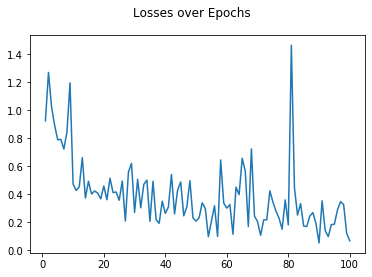

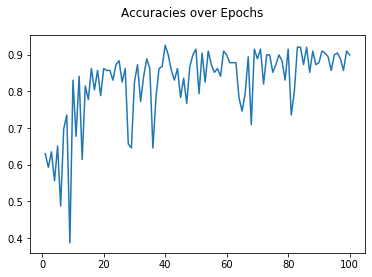

In [113]:
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import math
from matplotlib import pyplot as plt

LEARNING_RATE = 0.01
EPOCHS = 100
BATCH_SIZE = 16

model = network()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

losses = []
accuracies = []

training_size = len(X_train)
num_batches = math.ceil(training_size/BATCH_SIZE)

for epoch in range(EPOCHS):
    
    model.train()
    
    X_train, y_train = shuffle(X_train, y_train)
    
    accuracy = 0
    
    for batch in range(num_batches):
        
        X_train_batch = torch.tensor(X_train[batch*BATCH_SIZE:min(batch*BATCH_SIZE+BATCH_SIZE,training_size),:])
        y_train_batch = torch.tensor(y_train[batch*BATCH_SIZE:min(batch*BATCH_SIZE+BATCH_SIZE,training_size)], dtype=torch.long)
        
        optimizer.zero_grad()
        
        output = model(X_train_batch)
        
        loss = criterion(output, y_train_batch)
        loss.backward()
        
        optimizer.step()
        
    losses.append(loss.item())
    
    model.eval()

    pred = torch.argmax(model(torch.tensor(X_train)), dim=1).numpy()

    accuracies.append(np.sum(pred == y_train)/len(y_train))
        
    if (epoch % 10 == 9):
        print('Epoch {} / 100 : Loss: {}, Accuracy: {}'.format(epoch + 1, losses[epoch], accuracies[epoch]))
        
plt.plot(range(1, 101), losses)
plt.suptitle("Losses over Epochs")
plt.show()

plt.plot(range(1, 101), accuracies)
plt.suptitle("Accuracies over Epochs")
plt.show()

### Part d 
Evaluate the model on the test dataset. Print out the accuracy. Does this accuracy agrees with the training accuracy showed on the plot? Why may they be different?

In [114]:
model.eval()

pred = torch.argmax(model(torch.tensor(X_test)), dim=1).numpy()

print("Accuracy: ", np.sum(pred == y_test)/len(y_test))

Accuracy:  0.9523809523809523


**The accuracy on the test set is higher than the training accuracy on the plot, which is probably just due to random chance, as different iterations of training and testing produce different test results (ranging from 71% to 100%). All data has noise in it and the discrepancy between the training accuracy and the test accuracy can be random at times, however, a consistently lower test accuracy than training accuracy can be indicative of overfitting.**

## Problem 2

If you haven't done so already, please read Chapter 2 (on fairness) of the textbook.

### Part a

Import the 'semi_synthetic.csv' dataset. This dataset is a modified version of the UCI Credit card dataset (details [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)). We added a new synthetic feature to this dataset called `LIMIT_BAL`. It is highly predictive for `SEX==2` but not at all for `SEX==1`. As it turns out, this causes issues with fairness where models rely too much on `LIMIT_BAL` and discriminate against `SEX==2`. We will try to mitigate this in terms of the fairness criterion 'Statistical Parity' as it's mentioned in the textbook.

In [1]:
import pandas as pd

data = pd.read_csv("semi_synthetic.csv")

Extract features from the dataset (all columns except last) and call it `X`. Extract last column and call it `Y`. Also extract the `SEX` column and call this `SF` (for sensitive feature). Split all of these arrays data into train and test sets. You can use `sklearn.model_selection.train_test_split` and 20% ratio for the test dataset. Pass `stratify=Y` to `train_test_split` if you're using it. This ensures that both test and train datasets have the same ratio of 0/1 labels.

In [57]:
from sklearn.model_selection import train_test_split 
import numpy as np
import random
random.seed(2020)
np.random.seed(2020)

X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
SF = data['SEX']

X_train, X_test, Y_train, Y_test, SF_train, SF_test = train_test_split(X, Y, SF, stratify=Y, test_size = 0.2, random_state = 21)

Use a random forest classifier (whichever hyperparameters you want, you may leave it default) and train it using the train dataset (only `X_train` and `Y_train`. We will not use `SF_train` yet.)

In [58]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100).fit(X_train, Y_train)

### Part b

Now we will consider the 'statistical parity' fairness metric on the test dataset. This basically means we compare the selection rates (i.e. predicted labels being 1) conditioned on sex and look at their difference/ratio. To do this, print 5 things: 

1. Overall selection rate (what percent is predicted as 1)
2. Selection rate for `SEX==1`
3. Selection rate for `SEX==2`
4. Difference between 2. and 3.
5. Ratio of 2. and 3.

Note that we didn't use anything related to how accurate the model is.

In [59]:
Y_pred = model.predict(X_test)
Y_metrics = X_test.copy(deep=True)
Y_metrics['Y_pred'] = Y_pred

Y_1 = Y_metrics[Y_pred == 1]

print("1:", len(Y_1) / len(Y_pred) * 100, "%")

selection1 = len(Y_1[Y_1['SEX'] == 1]) / len(Y_metrics[Y_metrics['SEX'] == 1]) * 100
print("2:", selection1, "%")

selection2 = len(Y_1[Y_1['SEX'] == 2]) / len(Y_metrics[Y_metrics['SEX'] == 2]) * 100
print("3:", selection2, "%")
print("4:", abs(selection1 - selection2), "%")
print("5:", selection1 / selection2)

1: 15.866666666666667 %
2: 13.768718801996672 %
3: 17.269187986651836 %
4: 3.5004691846551648 %
5: 0.7972997232202903


There is a new Python package called `fairlearn` that aims to help machine learning researchers use fairness techniques more easily. Go ahead and download this package (`pip install fairlearn` or `conda install fairlearn`). Note: the authors of `fairlearn` call 'statistical parity' from the textbook as 'demographic parity'.

We will use `selection_rate`, `demographic_parity_difference`, `demographic_parity_ratio` from `fairlearn.metrics` to calculate 1., 4. and 5. above. The way to use these functions is: first argument `Y_test`, second argument `Y_prediction`, and for `demographic_parity_difference` and `demographic_parity_ratio` you need to give a keyword argument for the 'sensitive feature' by `sensitive_features=SF_test`.

Use these three functions and confirm your earlier calculations for 1., 4. and 5.

In [60]:
from fairlearn.metrics import selection_rate, demographic_parity_difference, demographic_parity_ratio

print("1:", selection_rate(Y_test, Y_pred))
print("4:", demographic_parity_difference(Y_test, Y_pred, sensitive_features=SF_test))
print("5:", demographic_parity_ratio(Y_test, Y_pred, sensitive_features=SF_test))

1: 0.15866666666666668
4: 0.03500469184655164
5: 0.7972997232202903


### Part c
### Mitigating Unfairness with Giving Weights to Datapoints

Now we are going to use the `GridSearch` function from `fairlearn.reductions` to try to mitigate this statistical parity discrepancy. This is one of the many ways to achieve this. What this function does is it gives higher weights to certain datapoints (determined by the sensitive feature) in order to change what the model learns. It automatically uses grid search to determine which weight should be given to `SEX==1` datapoints vs `SEX==2` datapoints (if you're interested you can read the source code). While it is called grid search, the space it searches is 1-dimensional. For our purposes, `GridSearch` takes four arguments: 

1. The model you defined above. This is a non-keyword argument.
2. Constraint. This needs to be an object defined by `fairlearn`, the class we will be using is `fairlearn.reductions.DemographicParity`. It corresponds to minimizing the difference in selection rates (4. from above). This is a non-keyword argument.
3. (Keyword argument) `grid_limit`. This determines the boundaries of the grid search. Basically, the `GridSearch` function will search the interval \[-`grid_limit`,`grid_limit`\] to find the weights. Choose this to be 0.8.
3. (Keyword argument) `grid_size`. This determines how many points there will be in the grid search. Choose this to be 21.

Just like `sklearn.model_selection.GridSearchCV` we have seen in HW1, `fairlearn.reductions.GridSearch` is also a wrapper, so you need to call `.fit()` on this wrapper (not the model directly). Training should be done in less than 5 minutes. In the end this wrapper will contain `grid_size` many models, each corresponding to a different weight for datapoints.

In [61]:
from fairlearn.reductions import GridSearch, DemographicParity

gs = GridSearch(RandomForestClassifier(n_estimators = 100),
                constraints = DemographicParity(),
                grid_limit = 0.8,
                grid_size = 21)

gs.fit(X_train, Y_train, sensitive_features=SF_train)

The `GridSearch` wrapper object you trained has a field called `predictors_`. This gives a list of all the models trained in this grid search, which will be of size `grid_size`.

In [62]:
predictions_sweep = [predictor.predict(X_test) for predictor in gs.predictors_] 
accuracy_sweep = [predictor.score(X_test, Y_test) for predictor in gs.predictors_] 

Notice that `predictions_sweep` is a 21 element list. Each of these elements is a numpy array that contains the predictions (`Y_pred`) for `X_test` for that particular model. Use `demographic_parity_difference` like you did above to find the difference in selection rates for each of these models and store these 'fairness metrics' in a numpy array (it too will be size 21).

In [63]:
from sklearn.metrics import accuracy_score

metrics = []
accuracies = []

for x in predictions_sweep:
    
    metrics.append(demographic_parity_difference(Y_test, x, sensitive_features=SF_test))
    accuracies.append(accuracy_score(x, Y_test))

Plot the accuracy vs difference in selection rates for all these models in a scatter plot.

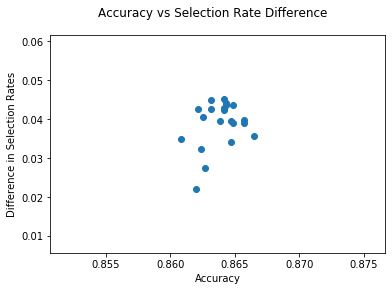

In [64]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(accuracies, metrics)
plt.suptitle("Accuracy vs Selection Rate Difference")
plt.ylabel("Difference in Selection Rates")
plt.xlabel("Accuracy")
plt.show()

### Part d 

Now calculate the *pareto front*: go over each (accuracy, difference in selection rates) pair and compare it to every other pair. If you find the first pair to have lower accuracy and higher difference in selection rate, discard it.

In [65]:
pareto = [[], []]
flag = False

for i in range(21):
    flag = False
    for j in range(21):
        if (metrics[j] < metrics[i] and accuracies[j] > accuracies[i]): 
            flag = True
    if (not flag):
        pareto[0].append(accuracies[i])
        pareto[1].append(metrics[i])

pareto

[[0.8626666666666667, 0.862, 0.8646666666666667, 0.8665],
 [0.027524111649290472,
  0.021980884658309552,
  0.03403717201031281,
  0.035698751987325555]]

* Plot the accuracy vs difference in selection rates for all the models the grid search in a scatter plot.
* On the same plot, plot the accuracy vs difference in selection rates for the points on the pareto front. Make these points red.

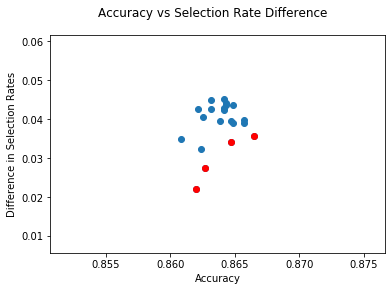

In [66]:
plt.figure()
plt.scatter(accuracies, metrics)
plt.scatter(pareto[0], pareto[1], color = "red")
plt.suptitle("Accuracy vs Selection Rate Difference")
plt.ylabel("Difference in Selection Rates")
plt.xlabel("Accuracy")
plt.show()

Which one of these models would you choose to use? Why?

**Personally I would choose to use to the rightmost point on the pareto curve, which is the model with the highest accuracy but not necessarily the most fair. I believe that if models must sacrifice one or the other, it is better for a model to be a little more biased but more accurate in the real world when it is making predictions. An overemphasis on making a model perfectly fair and unbiased at the cost of accuracy is counterintuitive, as it doesn't matter how fair the model is if the predictions it makes are not correct.**

## Problem 3

This problem builds on ideas from paper 2a in Module 1: “Against prediction: Sentencing, Policing, And Punishing In An Actuarial Age,” Chicago Public Law And Legal Theory Working Paper No. 94, Harcourt, 2005. 

Suppose we have two groups $A$ and $B$ of population sizes $n$ and $9n$. We find that under equal surveillance, group $A$’s offending rate is $2$ offenses per month per person and that of group $B$ is $1$ offense per person per month (See Figure on page 17 of the above paper). Equal surveillance means that out of a total of $10m$ monitors, $m$ monitors are assigned to group $A$ and $9m$ monitors are assigned to group $B$. The surveillance is $\frac{m}{n}$ per capita for both groups. So, under equal surveillance, the combined offending rate over both groups is $11n$ per month. 

Suppose we want to bring down the overall offending rate by increasing the monitors for group $A$. In order to do that we collected some data and found that we could model the rate of decrease in offenses for group $A$ by a function as follows:
	If we increase the per capita surveillance from $\frac{m}{n}$ to $\frac{m}{n} (1 + \delta_A)$, the offending rate declines to $2e^{- \alpha \delta_A}$. ($\alpha>0$)

Similarly, we modeled the rate of increase in offenses for group $B$ by a function under reduced surveillance as follows:
	If we decrease the per capita monitoring rate from $\frac{m}{n}$ to $\frac{m}{n} (1 - \delta_B)$, the offending rate rises to $e^{ \beta \delta_B}$. ($\beta>0$)

How would you distribute the monitors so that 

**a)** Both groups had the same offending rate?

**b)** The combined offending rate was minimized?


Consider 3 different scenarios when $\alpha > \beta$, $\alpha = \beta$, and $\alpha < \beta$. 

**c)** For each of the scenarios, which of the above solutions would you prefer and why?

**TIPS**:
- For **part a** and **part b**, answer by calculating $\delta_A$ and $\delta_B$.
- Try to set up equations from the given information. This problem mostly consists of algebra.
- If you do it correctly, **part c** should makes sense immediately.


a) To make both groups have the same offending rate, we must satisfy:

$2e^{- \alpha \delta_A} = e^{ \beta \delta_B}$

$2 = e^{ \beta \delta_B + \alpha \delta_A}$

And because the total number of monitors is 10, we have:

$m(1+\delta_A) + 9m(1 - \delta_B) = 10m$

$1+\delta_A + 9 - 9\delta_B = 10$

$\delta_A = 9\delta_B$

Thus:

$2 = e^{ \beta \delta_B + \alpha \delta_A} = e^{ \beta \delta_B + 9\alpha \delta_B} = e^{ (\beta + 9\alpha)\delta_B}$

$ln(2) = (\beta + 9\alpha)\delta_B$

and:

$\delta_B = \frac{ln(2)}{\beta + 9\alpha}$

$\delta_A = \frac{9ln(2)}{(\beta + 9\alpha)}$

b) To minimize the combined offending rate, we must satisfy:

$d(2e^{- \alpha \delta_A} + e^{ \beta \delta_B}) = 0$

$\frac{d}{d\delta_B}(2e^{- 9\alpha \delta_B} + e^{ \beta \delta_B}) = 0$

$- 18\alpha e^{- 9\alpha \delta_B} + \beta e^{ \beta \delta_B} = 0$

$ e^{ (\beta + 9\alpha)\delta_B} = \frac{18\alpha}{\beta}$

$(\beta + 9\alpha)\delta_B = ln(\frac{18\alpha}{\beta})$

and:

$\delta_B = \frac{ln(\frac{18\alpha}{\beta})}{\beta + 9\alpha}$

$\delta_A = \frac{9(ln(\frac{18\alpha}{\beta}))}{\beta + 9\alpha}$

c) Example graphs for each scenario are attached.

Scenario 1: $\alpha > \beta$

$\frac{18\alpha}{\beta} > 18 > 2$

$\delta_{A(equal)} > \delta_{A(min)}$

For this scenario, I would prefer to minimize the combined offending rate, even though minimizing the combined offending rate will require more monitoring shifted from group B to group A than making both groups have the same offending rate. While minimizing the combined offending rate in this case requires a more drastic action and does cause group B's offending rate to increase significantly, I think it is more fair because group A's offending rate is reduced by an extremely significant amount, almost driving it to 0 in some cases. Although it can be argued that this is unfair as group B does not receive the same amount of help as group A, I believe it is ultimately the best solution as group A is able to better effectively utilize the monitoring to lower their offending rate, thus making it so that the monitoring is distributed according to where it is the most beneficial.

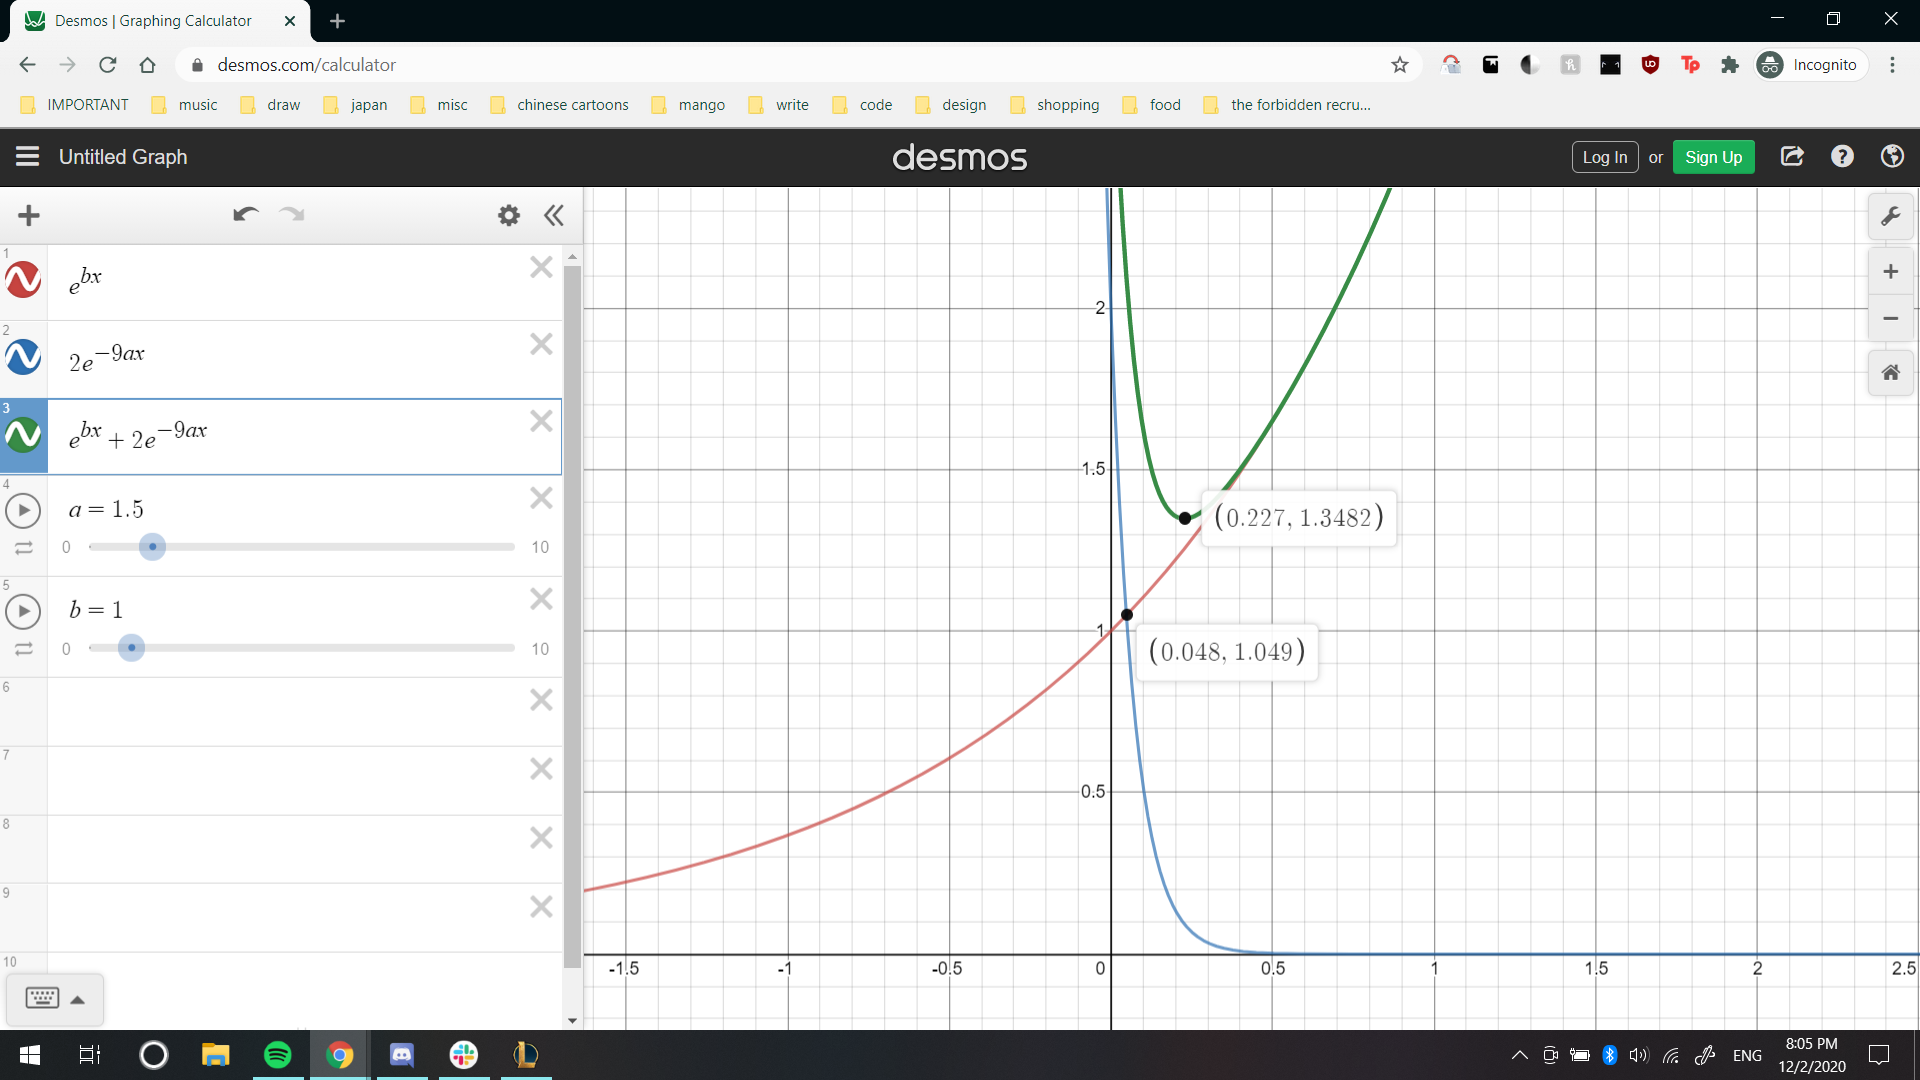

Scenario 2: $\alpha < \beta$

$\frac{18\alpha}{\beta} = 18 > 2$

$\delta_{A(equal)} > \delta_{A(min)}$

This scenario is pretty similar to scenario A: minimizing the combined offending rate still always requires more shifted monitoring than is required to make both groups have the same offending rate. However, the same argument cannot be used because the equivalence of alpha and beta means that both groups are technically able to use the monitoring equally effectively. In this case, I would prefer to make both groups have the same offending rate. Not only would this be more fair as less shifting of monitoring is required, it makes it so that groups with similar characteristics would end up the same after the help is distributed, which is fair.

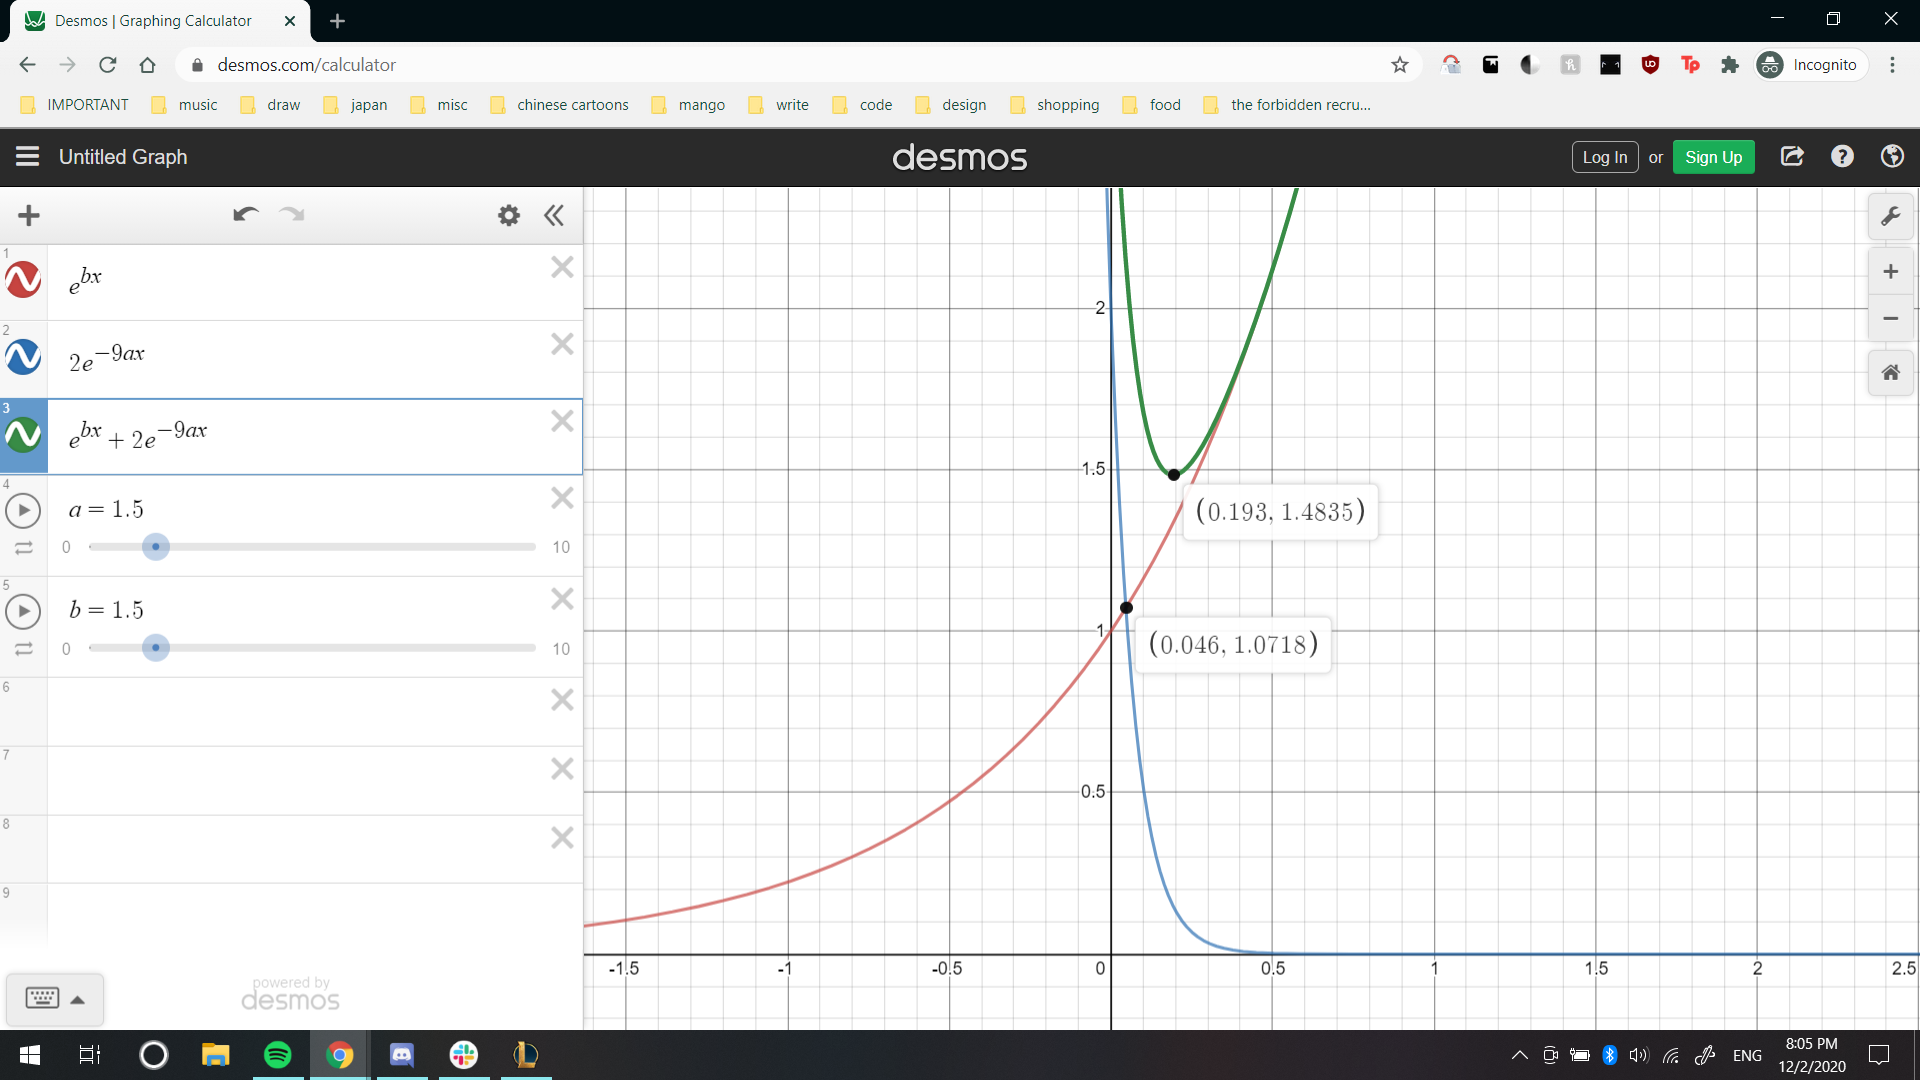

Scenario 3: $\alpha = \beta$

This scenario is the most volatile, as depending on the actual calues of alpha and beta, minimizing the combined offending rate can either require more, less, or the same amount of shifted monitoring that it takes to make both groups have the same offending rate. In many cases, however, an extreme enough disparity between alpha and beta causes minimization to actually require less shifted monitoring than making them equal. Thus I would prefer to minimize the combined offending rate, as not only does it require less shifted monitoring, which is more fair to the proportions of population within each group, it causes group B's offending rate to rise less while doing so. In the cases that minimizing does not require less shifting, it still requires less than the other scenarios.

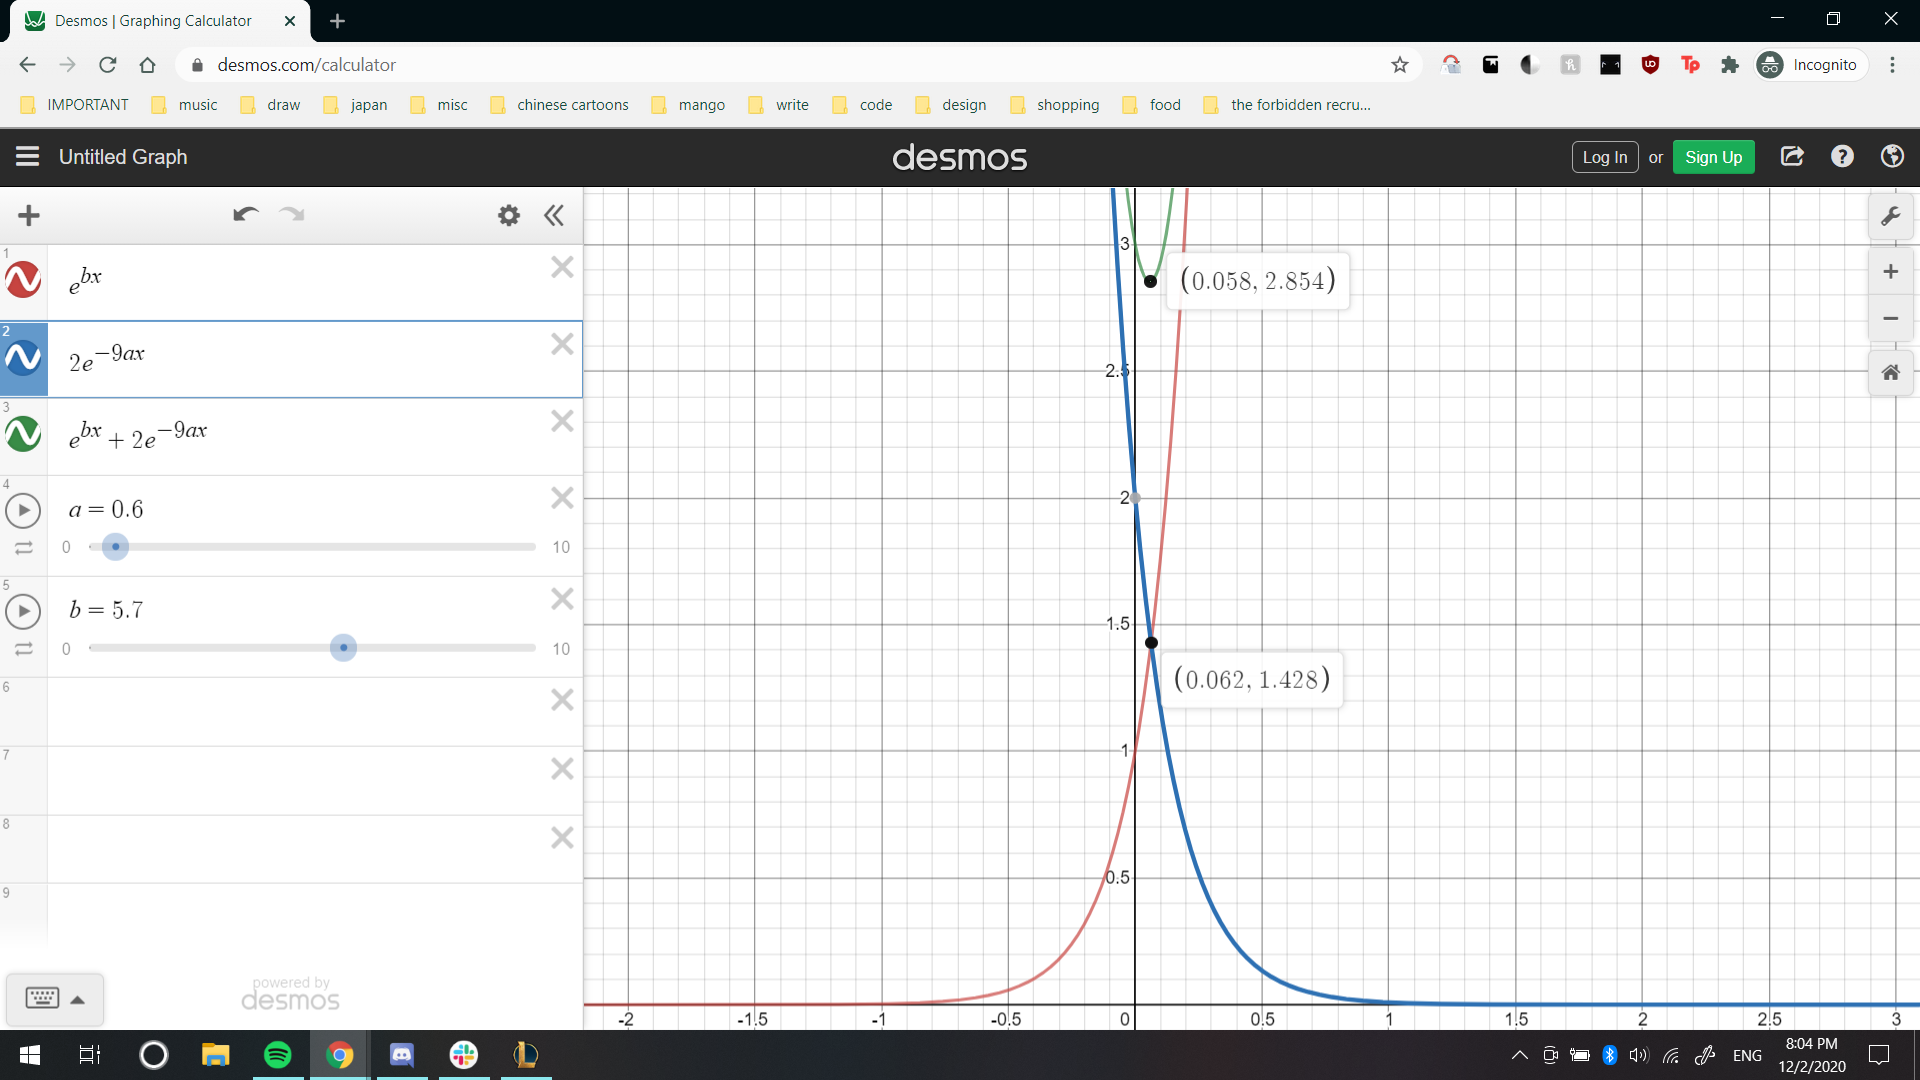